# Add Cross Validation



# Updates to make as of 5.30.2023 @ 3:39


- Load data
- Split off Val set
- Apply SMOTE
- Hyper tune
- Pipeline those auto tuned parameters into new model
- break off data into test and train
- Run model and test on test and val set using tuned parameters
- Evaluate




# Reviewed and drop state
- ^^^^^ Do This!!!



# 5.31.2023 @ 8:55 - Look into summing charge/minutes


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
pd.read_csv("Raw_Data/Churn_Data.csv")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Load the dataset into a Pandas DataFrame:

In [3]:
data = pd.read_csv("Raw_Data/Churn_Data.csv")

# Define the features (X) and the target variable (y):

In [4]:
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

# Cleaning:

In [5]:
data['area code'].unique()

array([415, 408, 510], dtype=int64)

- Was looking to see if area code was a more granular version of 'state'. Removing since there are only 3 types of area code. 

In [6]:
X_encoded = pd.get_dummies(X, columns=['state', 'international plan', 'voice mail plan'])

In [7]:
X_encoded = X_encoded.drop(columns=['phone number', 'area code', 'international plan_no', 'voice mail plan_no'])

In [8]:
X_encoded.isnull().sum().head(40)

account length            0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
state_AK                  0
state_AL                  0
state_AR                  0
state_AZ                  0
state_CA                  0
state_CO                  0
state_CT                  0
state_DC                  0
state_DE                  0
state_FL                  0
state_GA                  0
state_HI                  0
state_IA                  0
state_ID                  0
state_IL                  0
state_IN                  0
state_KS                  0
state_KY                  0
state_LA                  0
state_MA                  0
state_MD            

In [9]:
X_encoded

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,1,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,1,0


# Train, Test, Validate Spliting

In [10]:
# # Split the data into training and temporary sets (70% training, 30% temporary)
# X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [11]:
# # Split the temporary data into testing and validation sets (50% testing, 50% validation)
# X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [13]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (2333, 68)
Testing set shape: (500, 68)
Validation set shape: (500, 68)


In [14]:
X_train.to_excel('Testing_Outputs/DT_X_train.xlsx', index=False)

In [15]:
X_train

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
2016,80,0,202.4,118,34.41,260.2,67,22.12,177.4,112,...,0,0,0,0,0,0,0,0,0,0
1362,63,0,132.9,122,22.59,67.0,62,5.70,160.4,121,...,0,0,0,0,0,0,1,0,0,0
2670,116,12,221.0,108,37.57,151.0,118,12.84,179.0,80,...,0,0,0,0,0,0,0,1,0,1
2210,71,0,278.9,110,47.41,190.2,67,16.17,255.2,84,...,0,1,0,0,0,0,0,0,0,0
1846,120,43,177.9,117,30.24,175.1,70,14.88,161.3,117,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,...,0,0,0,0,0,0,0,0,0,0
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,...,0,0,0,0,0,0,0,0,0,0
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,...,0,0,0,0,0,0,0,0,0,0
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,...,0,0,0,0,0,0,0,0,0,0


# Identifying best inputs to use on model

In [16]:
Tester = DecisionTreeClassifier()
Tester.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

# Create an instance of the decision tree classifier
model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(Tester, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 8, 'min_samples_split': 10}


In [18]:
best_model

DecisionTreeClassifier(max_depth=15, max_features=0.8, min_samples_leaf=8,
                       min_samples_split=10)

In [19]:
# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.93
Precision: 0.8055555555555556
Recall: 0.7341772151898734
F1 Score: 0.7682119205298013


In [20]:
report = classification_report(y_test, test_predictions)
print(report)

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       421
        True       0.81      0.73      0.77        79

    accuracy                           0.93       500
   macro avg       0.88      0.85      0.86       500
weighted avg       0.93      0.93      0.93       500



In [21]:
# Use the best model for prediction on the validation set
val_predictions = best_model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.926
Precision: 0.7647058823529411
Recall: 0.609375
F1 Score: 0.6782608695652174


In [22]:
report = classification_report(y_val, test_predictions)
print(report)

              precision    recall  f1-score   support

       False       0.86      0.85      0.86       436
        True       0.08      0.09      0.09        64

    accuracy                           0.75       500
   macro avg       0.47      0.47      0.47       500
weighted avg       0.76      0.75      0.76       500



# Apply SMOTE

In [23]:
# # Apply SMOTE for oversampling
# smote = SMOTE()
# X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# # Print the best parameters found
# print("Best Parameters:", grid_search.best_params_)

# # Fit the best model on the oversampled training data
# best_model.fit(X_train_oversampled, y_train_oversampled)

In [24]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

# Create an instance of the decision tree classifier
model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')


In [25]:
# Apply SMOTE for oversampling on the training data
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Fit the grid search to the oversampled training data
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 15, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [26]:


param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

randomized_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, scoring='accuracy', n_iter=10)
randomized_search.fit(X_train_oversampled, y_train_oversampled)

best_model_RS = randomized_search.best_estimator_

best_model_RS

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5)

# Grid Search model

In [27]:
# Grid Search model


# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.868
Precision: 0.5575221238938053
Recall: 0.7974683544303798
F1 Score: 0.65625


In [28]:
report = classification_report(y_test, test_predictions)
print(report)

              precision    recall  f1-score   support

       False       0.96      0.88      0.92       421
        True       0.56      0.80      0.66        79

    accuracy                           0.87       500
   macro avg       0.76      0.84      0.79       500
weighted avg       0.90      0.87      0.88       500



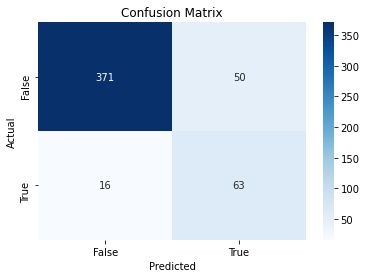

In [29]:
cm = confusion_matrix(y_test, test_predictions)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

# Random Search model

In [30]:
#Randomized Search Model


# Use the best model for prediction on the testing set
test_predictions_RS = best_model_RS.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions_RS)
precision = precision_score(y_test, test_predictions_RS)
recall = recall_score(y_test, test_predictions_RS)
f1 = f1_score(y_test, test_predictions_RS)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.878
Precision: 0.5833333333333334
Recall: 0.7974683544303798
F1 Score: 0.6737967914438503


In [31]:
report = classification_report(y_test, test_predictions_RS)
print(report)

              precision    recall  f1-score   support

       False       0.96      0.89      0.92       421
        True       0.58      0.80      0.67        79

    accuracy                           0.88       500
   macro avg       0.77      0.85      0.80       500
weighted avg       0.90      0.88      0.89       500



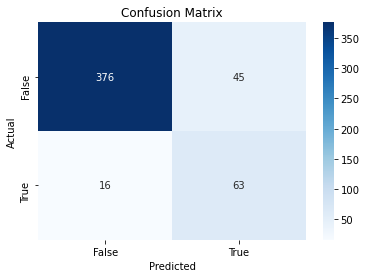

In [32]:
cm = confusion_matrix(y_test, test_predictions_RS)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

# Validation Set using GridSearch Model

In [33]:

# Use the best model for prediction on the validation set
val_predictions = best_model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.878
Precision: 0.5151515151515151
Recall: 0.796875
F1 Score: 0.6257668711656442


In [34]:
report = classification_report(y_val, test_predictions)
print(report)

              precision    recall  f1-score   support

       False       0.86      0.76      0.81       436
        True       0.08      0.14      0.10        64

    accuracy                           0.68       500
   macro avg       0.47      0.45      0.45       500
weighted avg       0.76      0.68      0.72       500



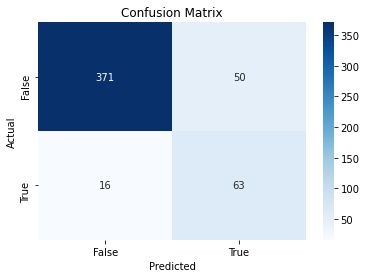

In [35]:
cm = confusion_matrix(y_test, test_predictions)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

# Validation Set using RandomSearch Model

In [36]:

# Use the best model for prediction on the validation set
val_predictions2 = best_model_RS.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions2)
precision = precision_score(y_val, val_predictions2)
recall = recall_score(y_val, val_predictions2)
f1 = f1_score(y_val, val_predictions2)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.854
Precision: 0.45794392523364486
Recall: 0.765625
F1 Score: 0.5730994152046783


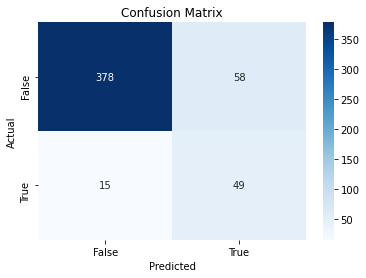

In [37]:
cm = confusion_matrix(y_val, val_predictions2)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

# Graphs

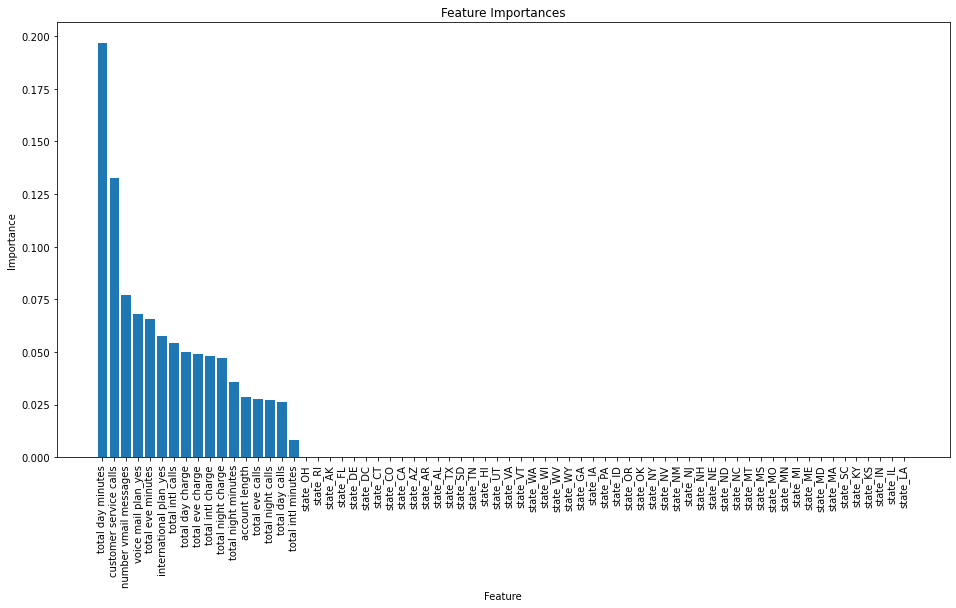

In [38]:
# Get feature importances
importances = best_model_RS.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create bar plot of feature importances
plt.figure(figsize=(16, 8))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [39]:
correlation_with_target = data.corr()['churn'].drop('churn')
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

Correlation with Target:
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
number vmail messages     0.089728
total intl charge         0.068259
total intl minutes        0.068239
total intl calls          0.052844
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
Name: churn, dtype: float64


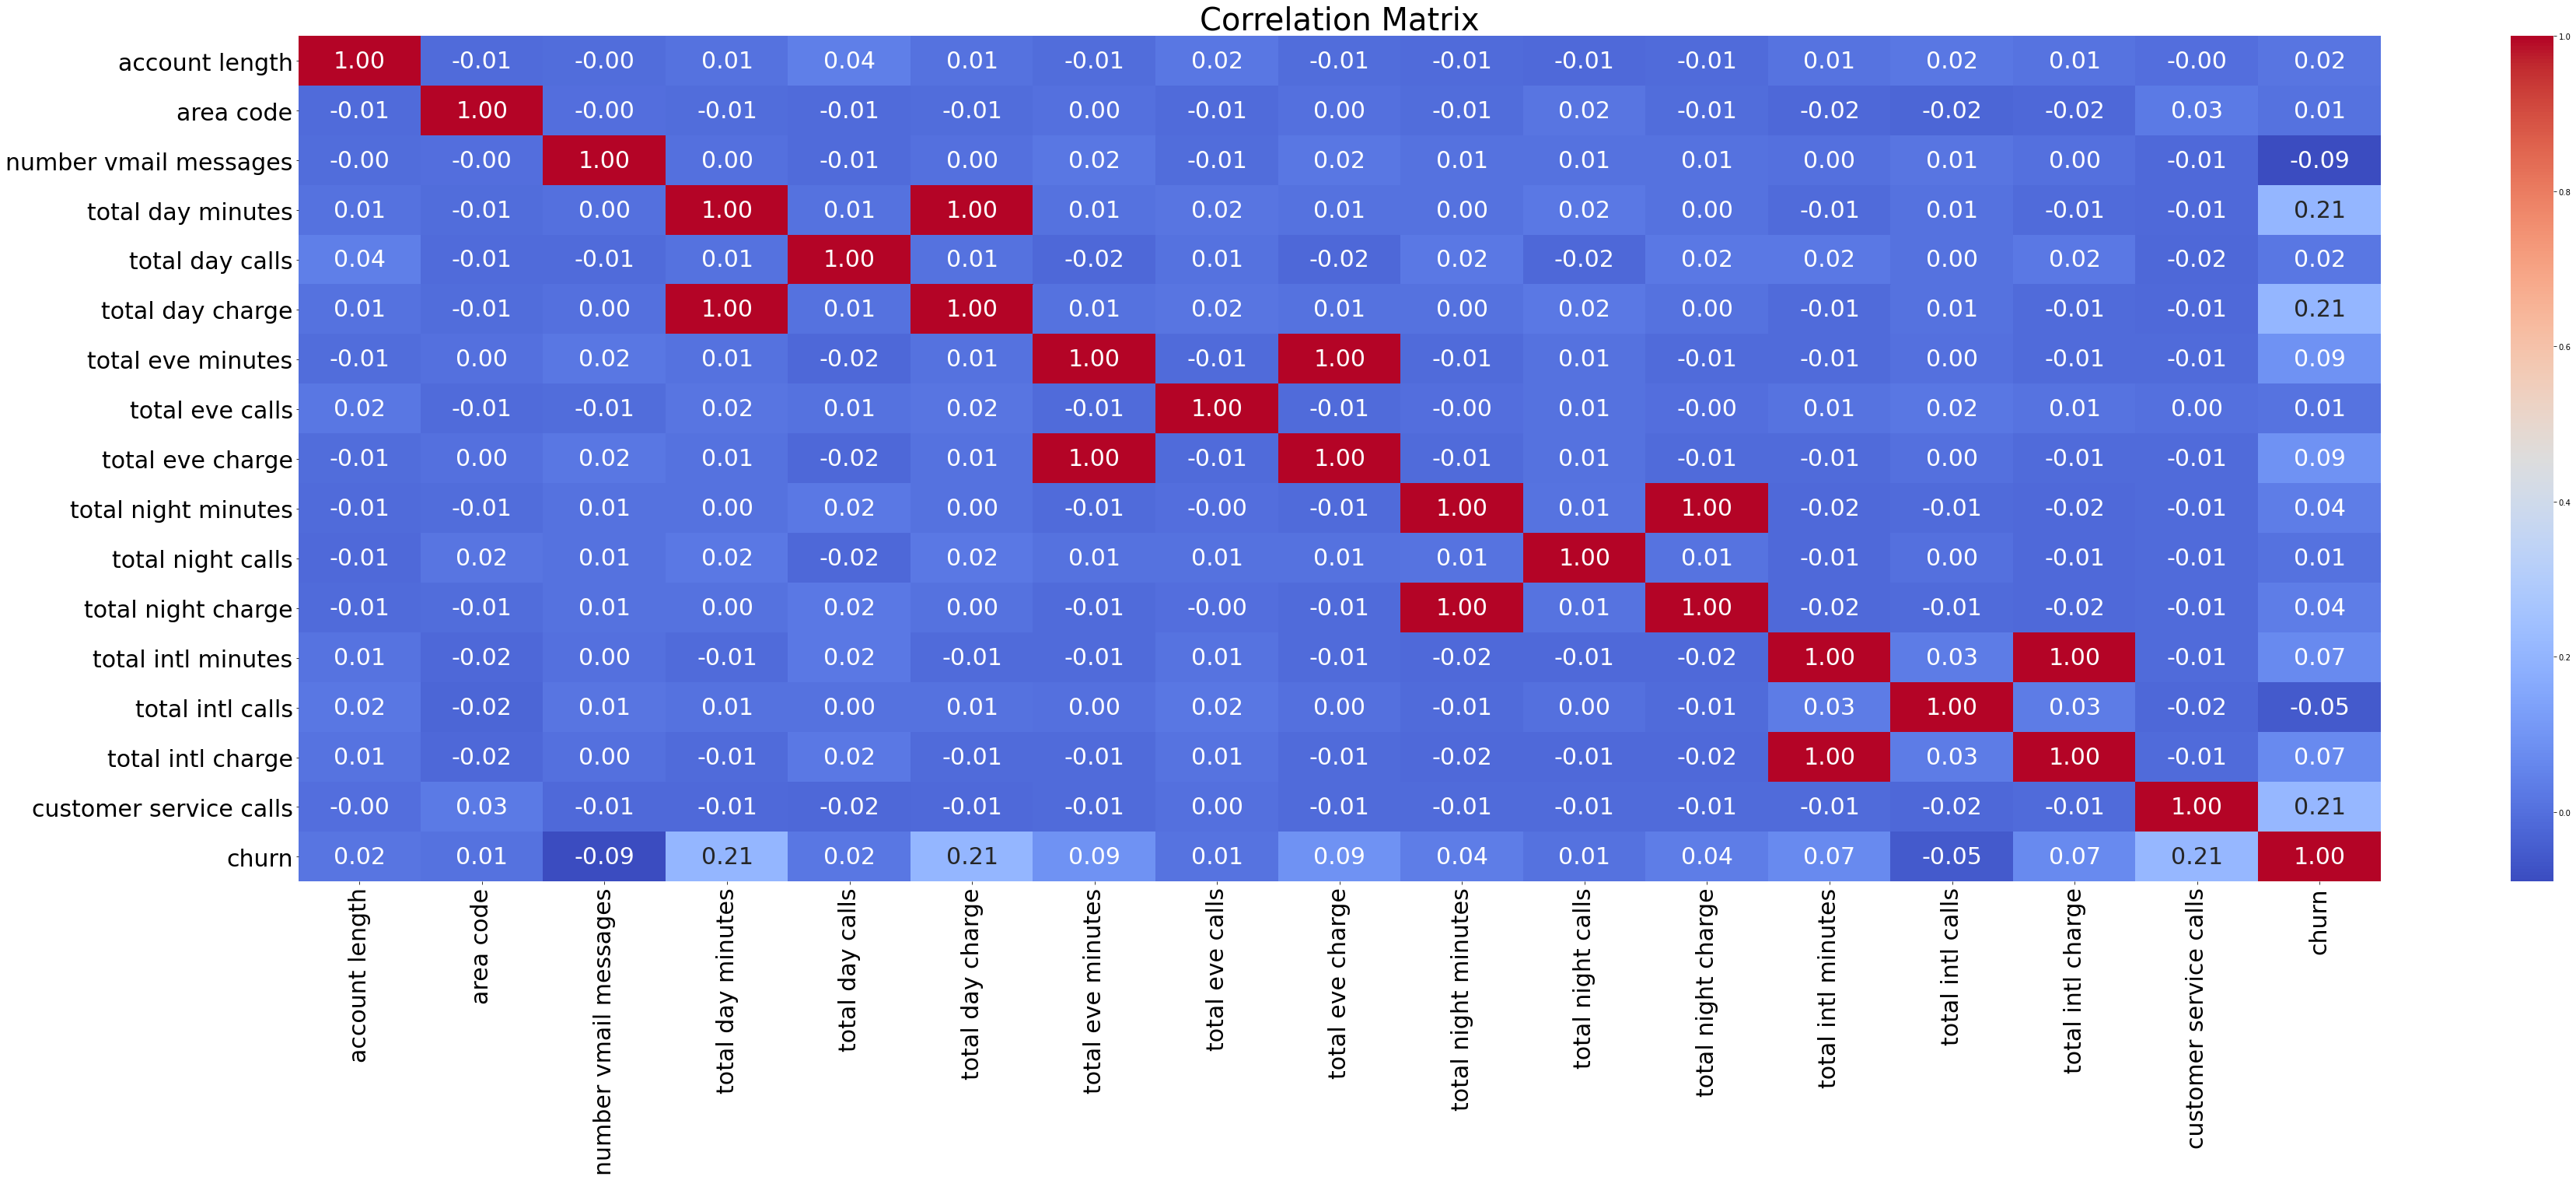

In [40]:
correlation_matrix = data.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"fontsize": 30})
plt.title("Correlation Matrix", fontsize=40)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()

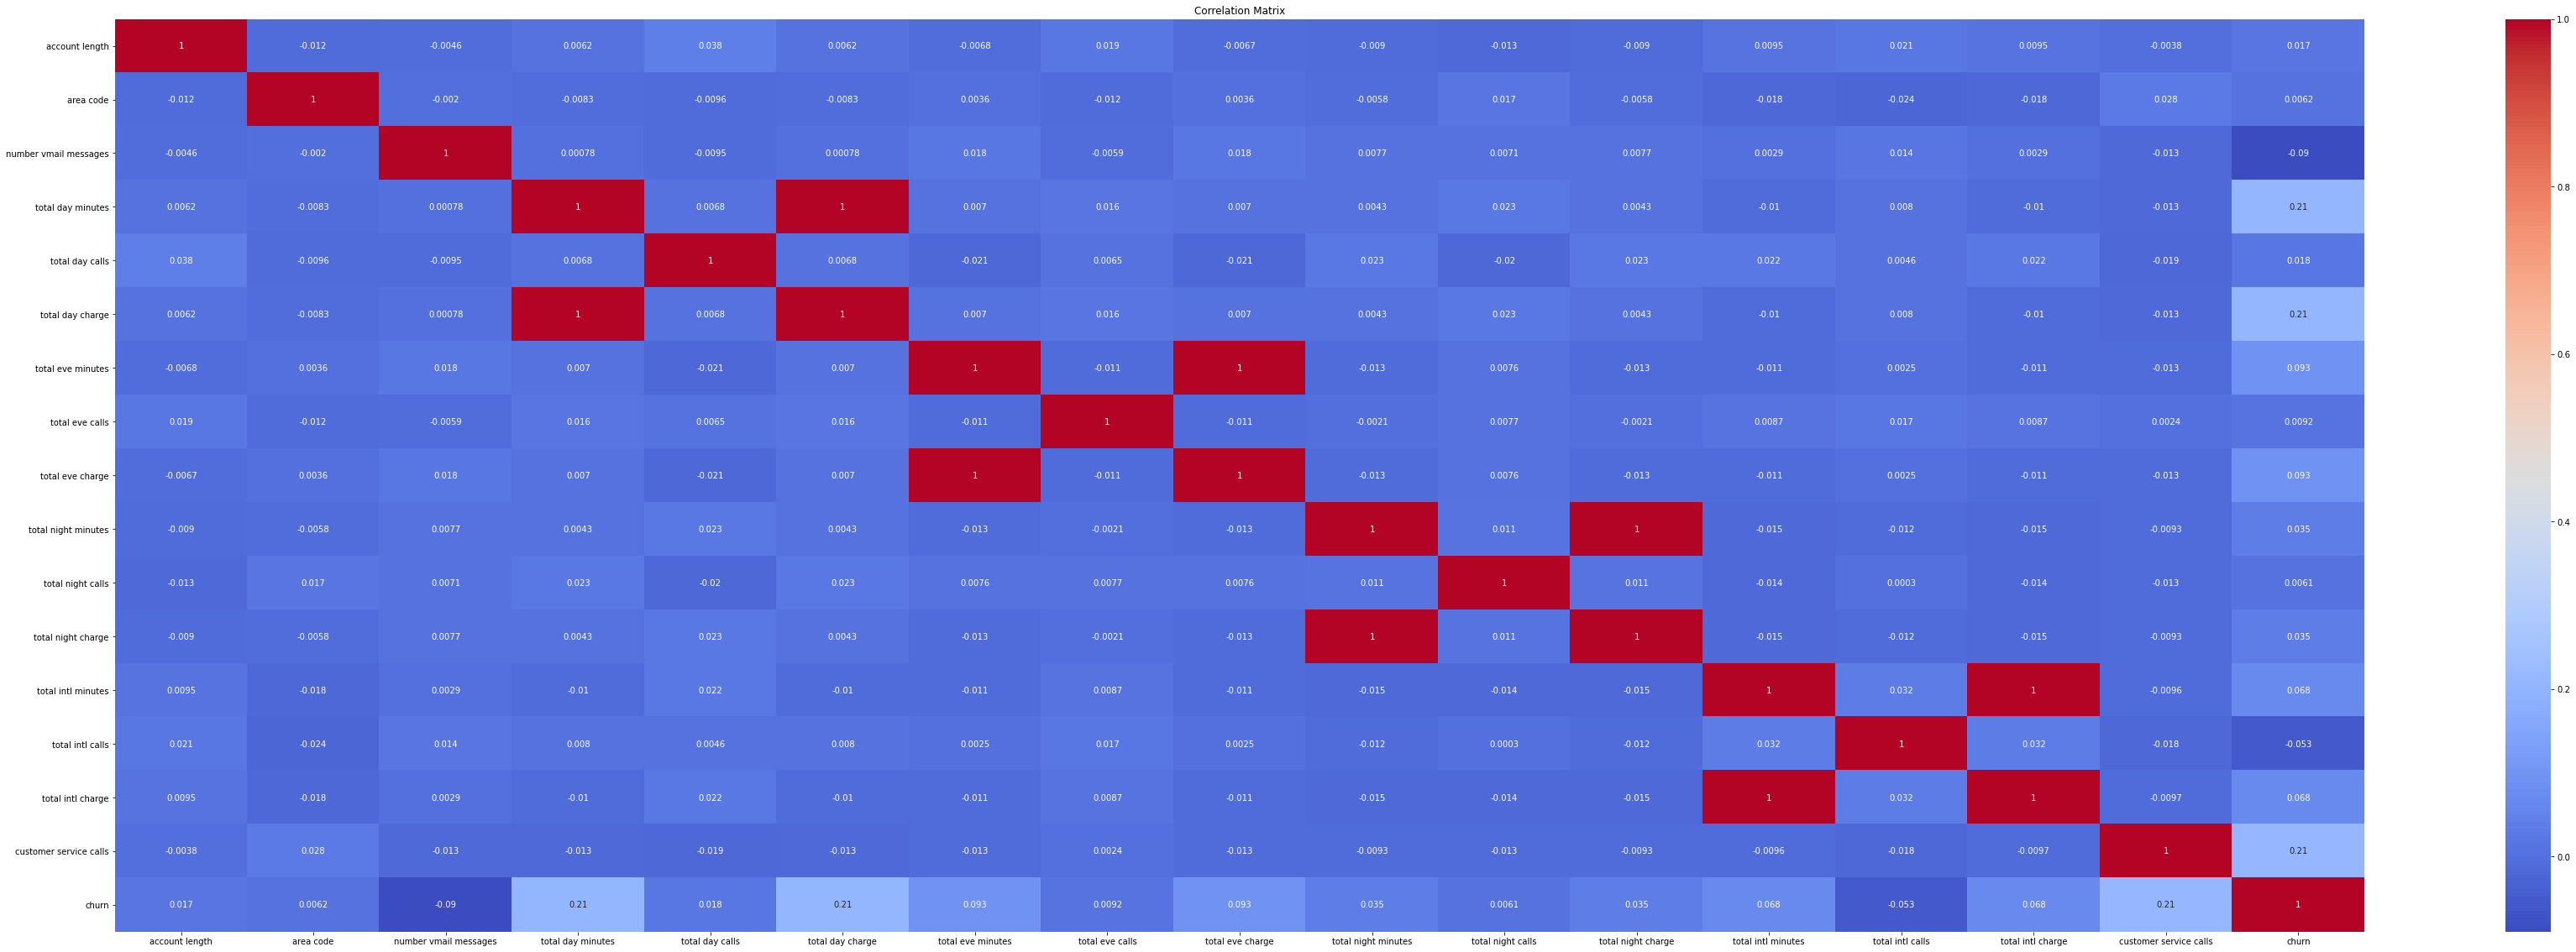

In [41]:
correlation_matrix = data.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

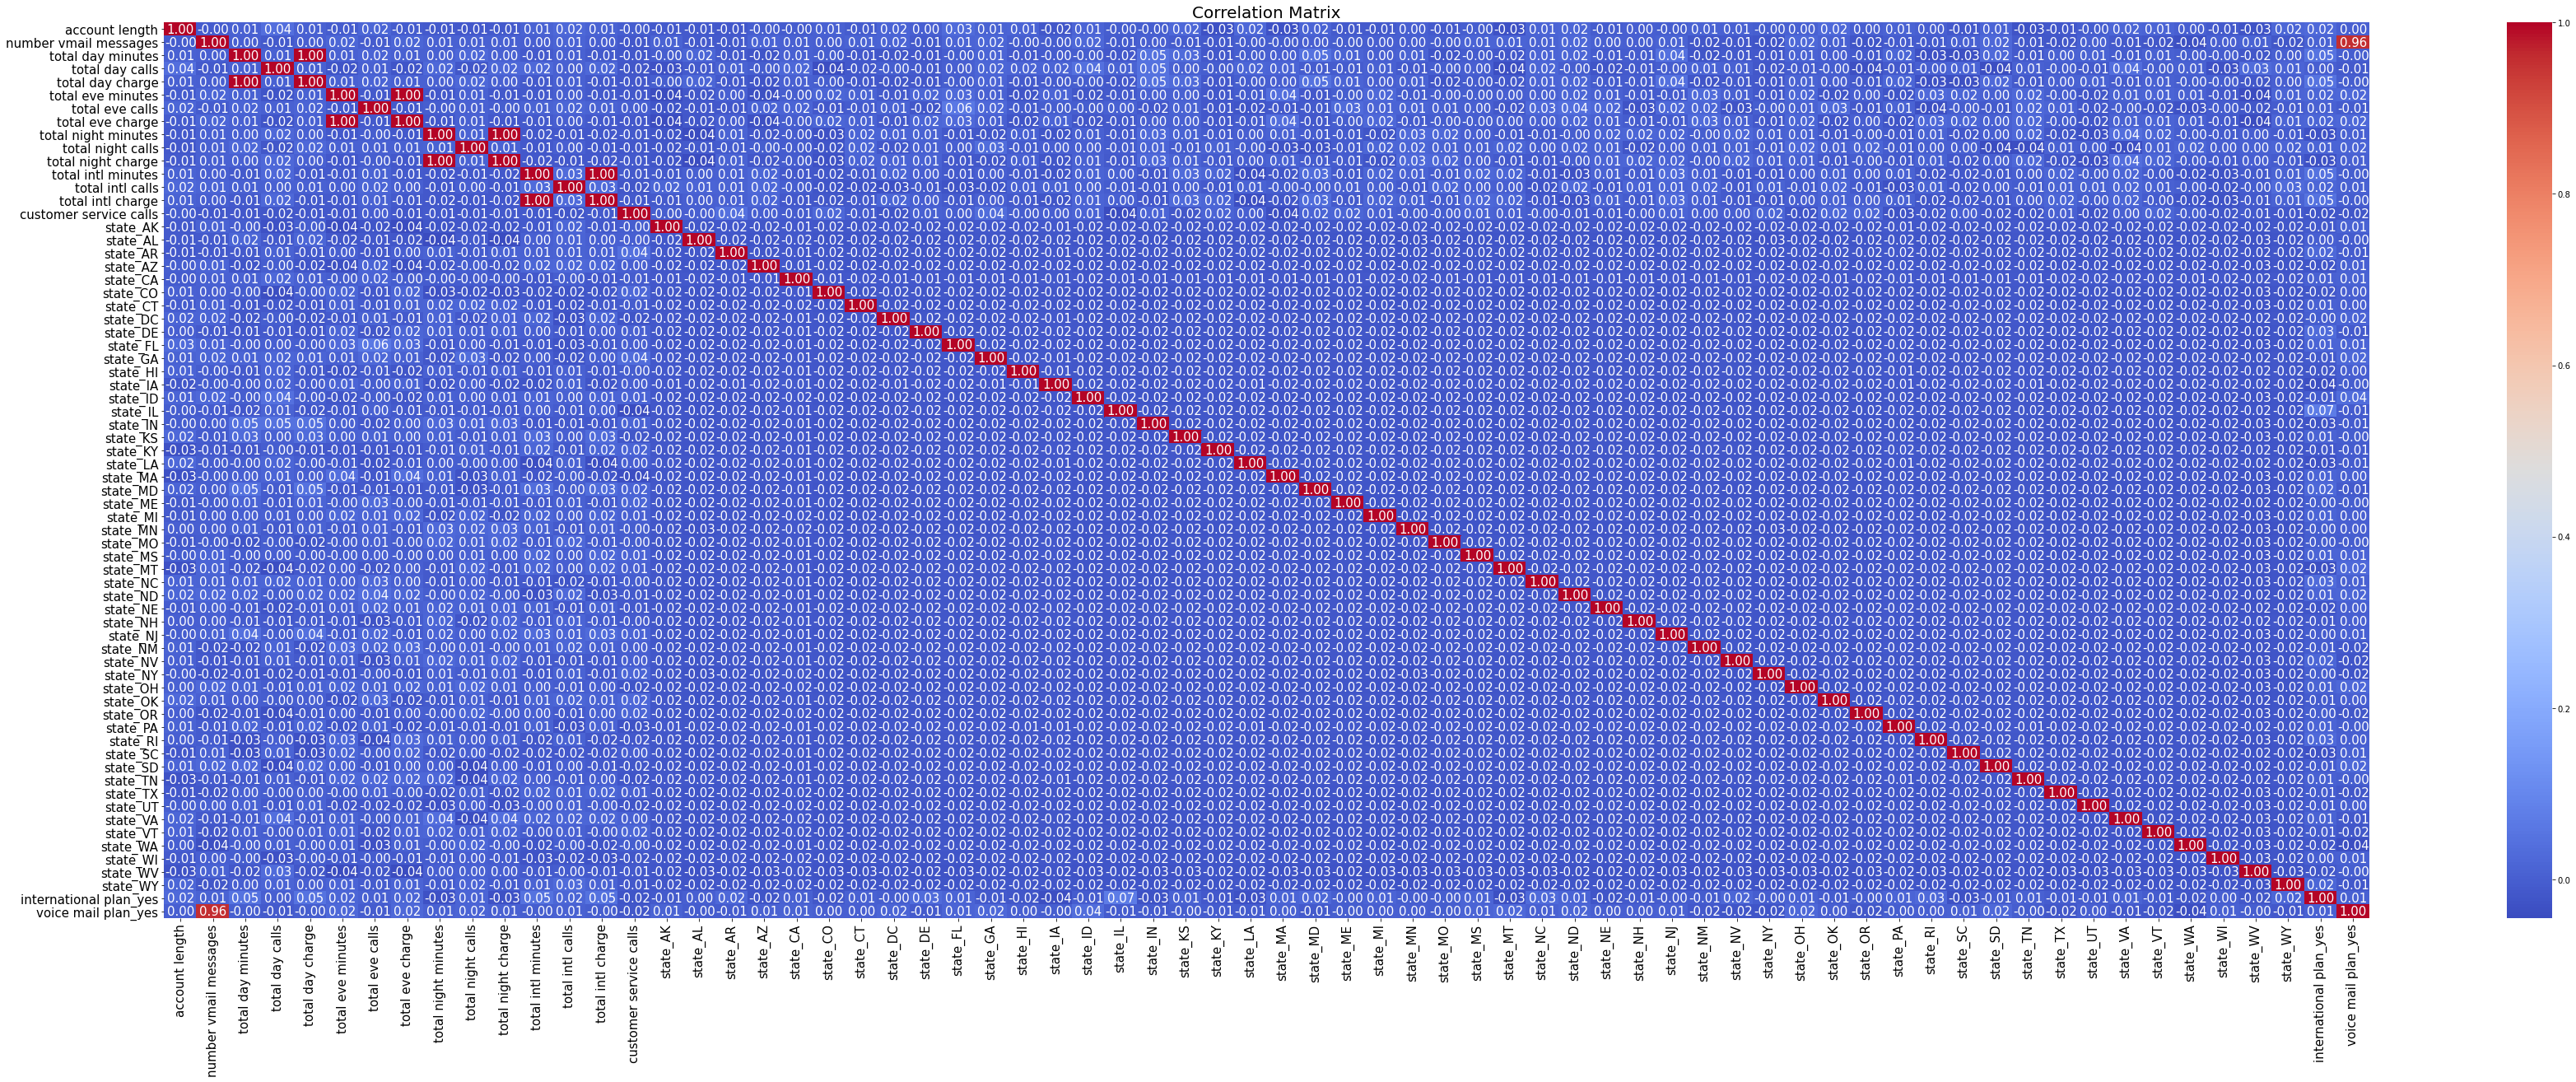

In [42]:
correlation_matrix = X_encoded.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"fontsize": 15})
plt.title("Correlation Matrix", fontsize=20)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.show()

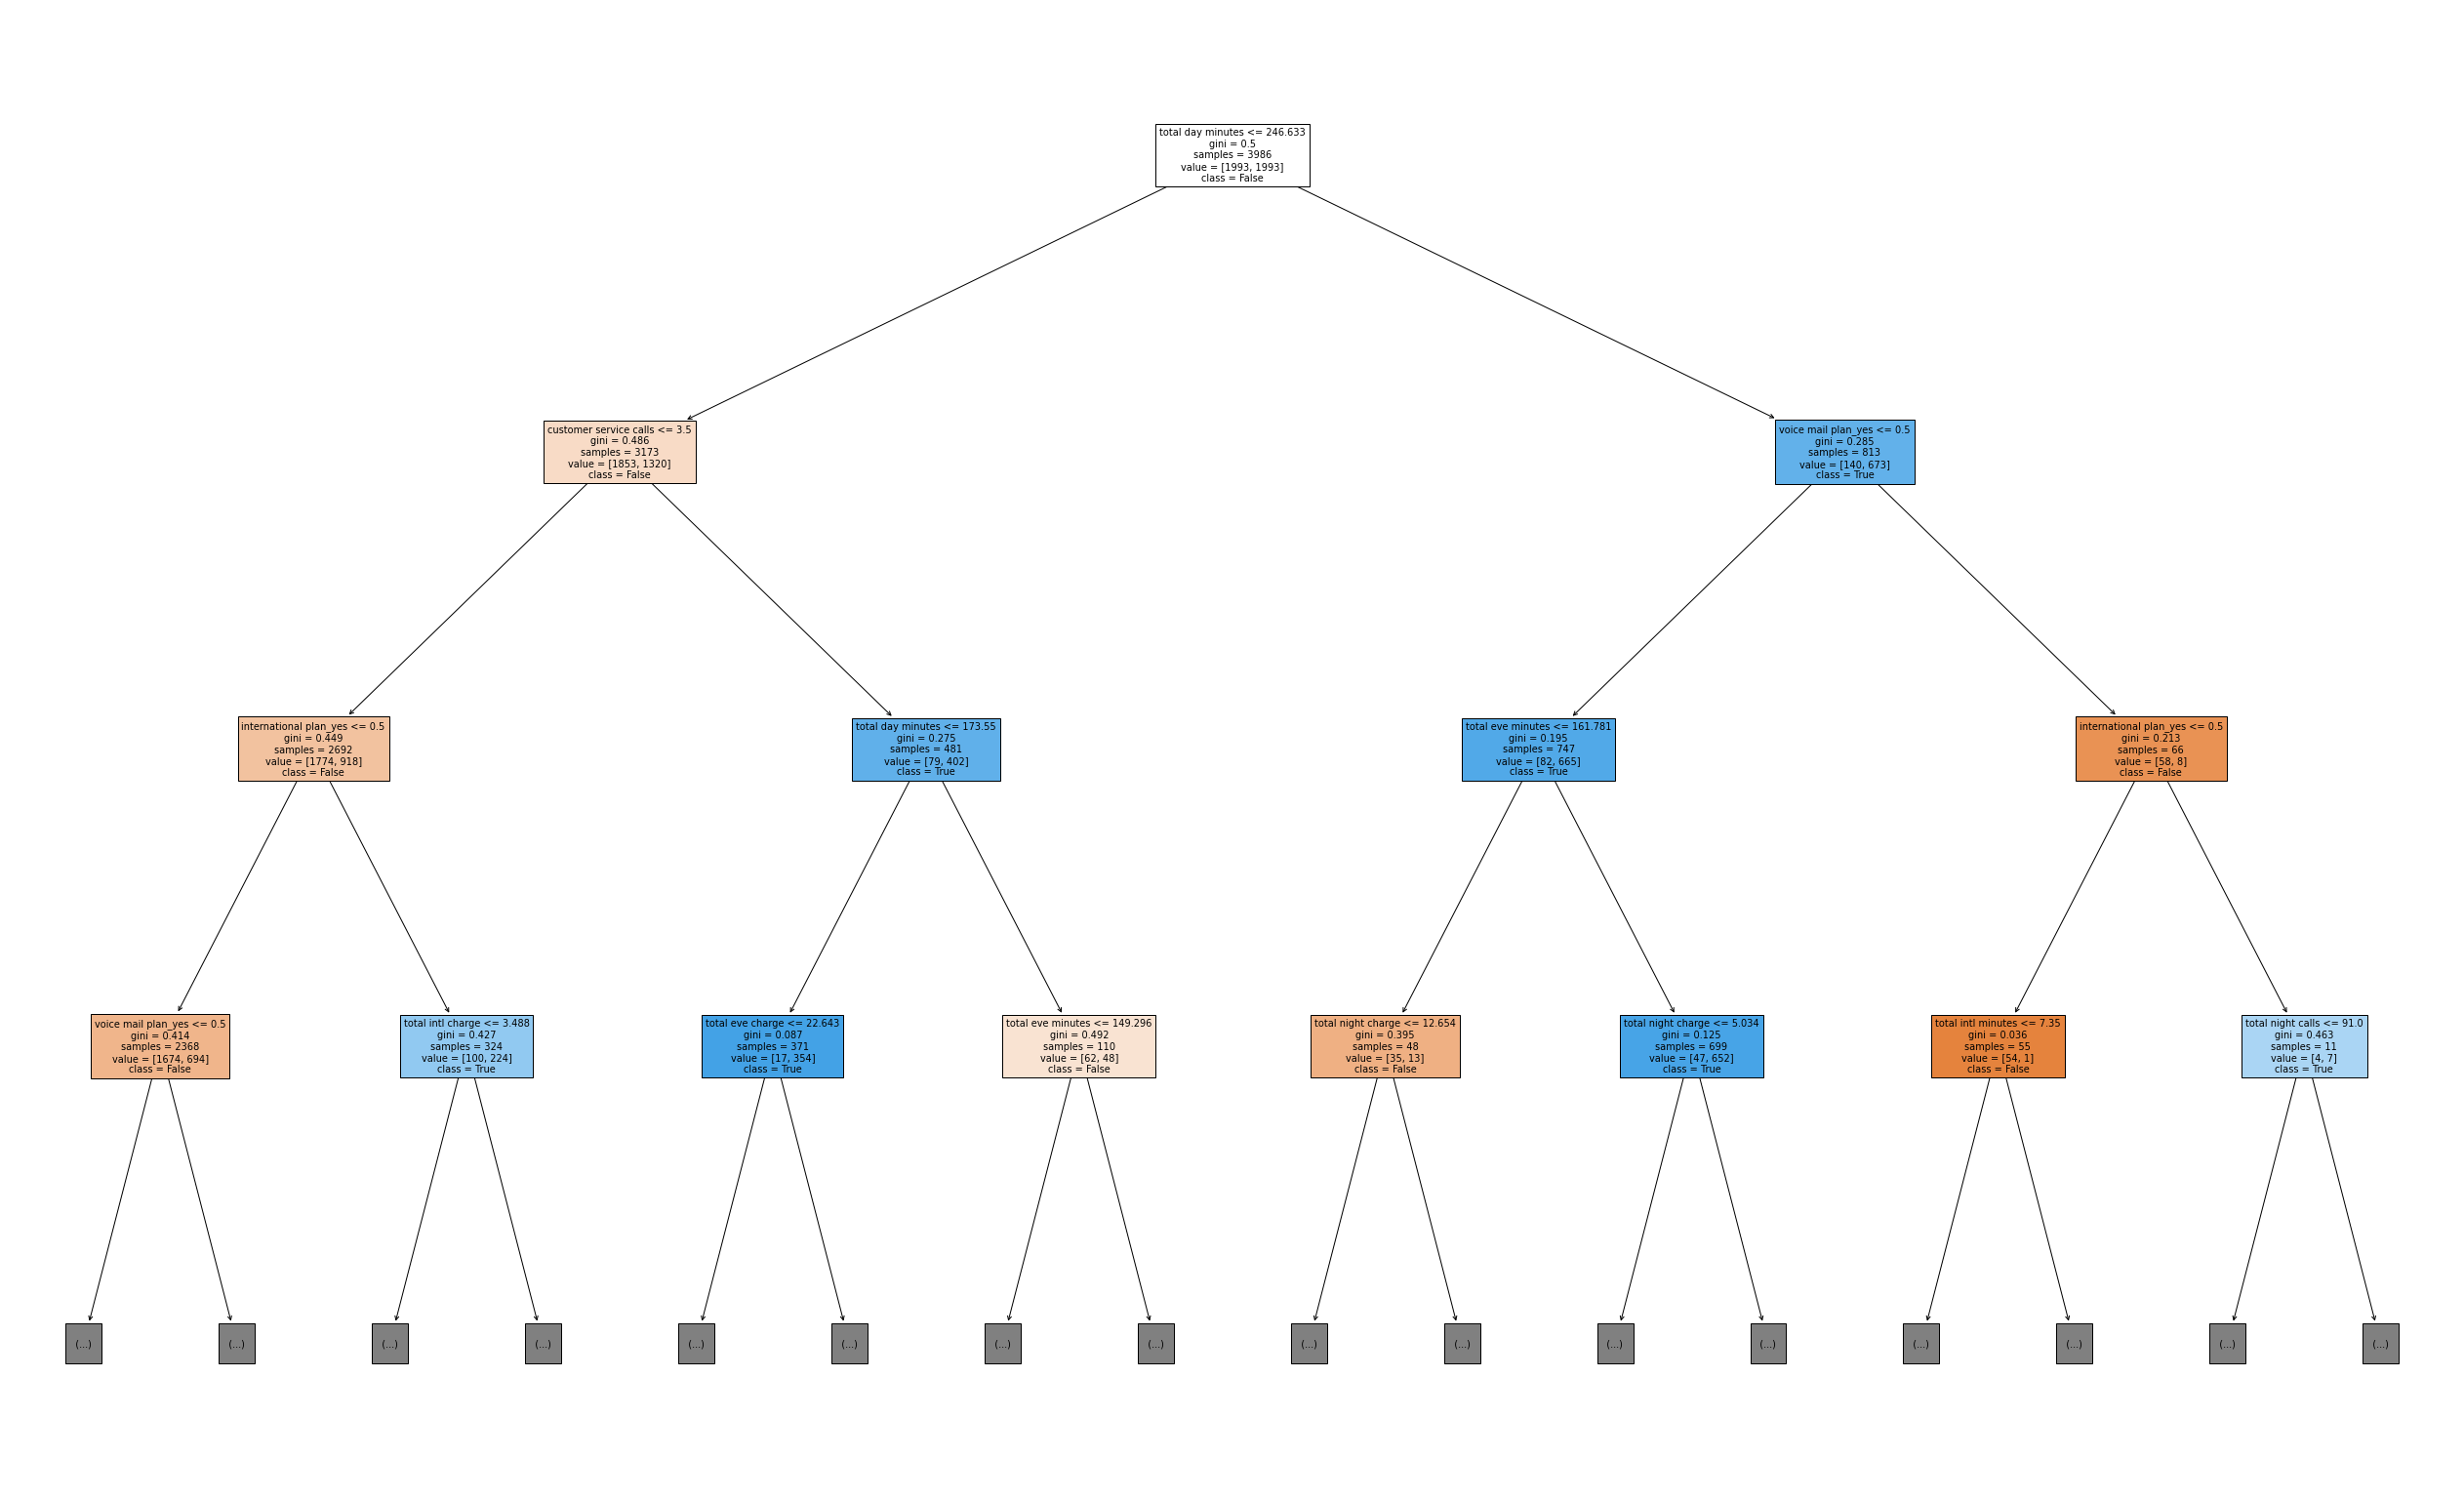

In [43]:
plt.figure(figsize=(45, 28))
plot_tree(best_model_RS, feature_names=X_encoded.columns, max_depth=3, class_names=['False', 'True'], filled=True)
plt.show()

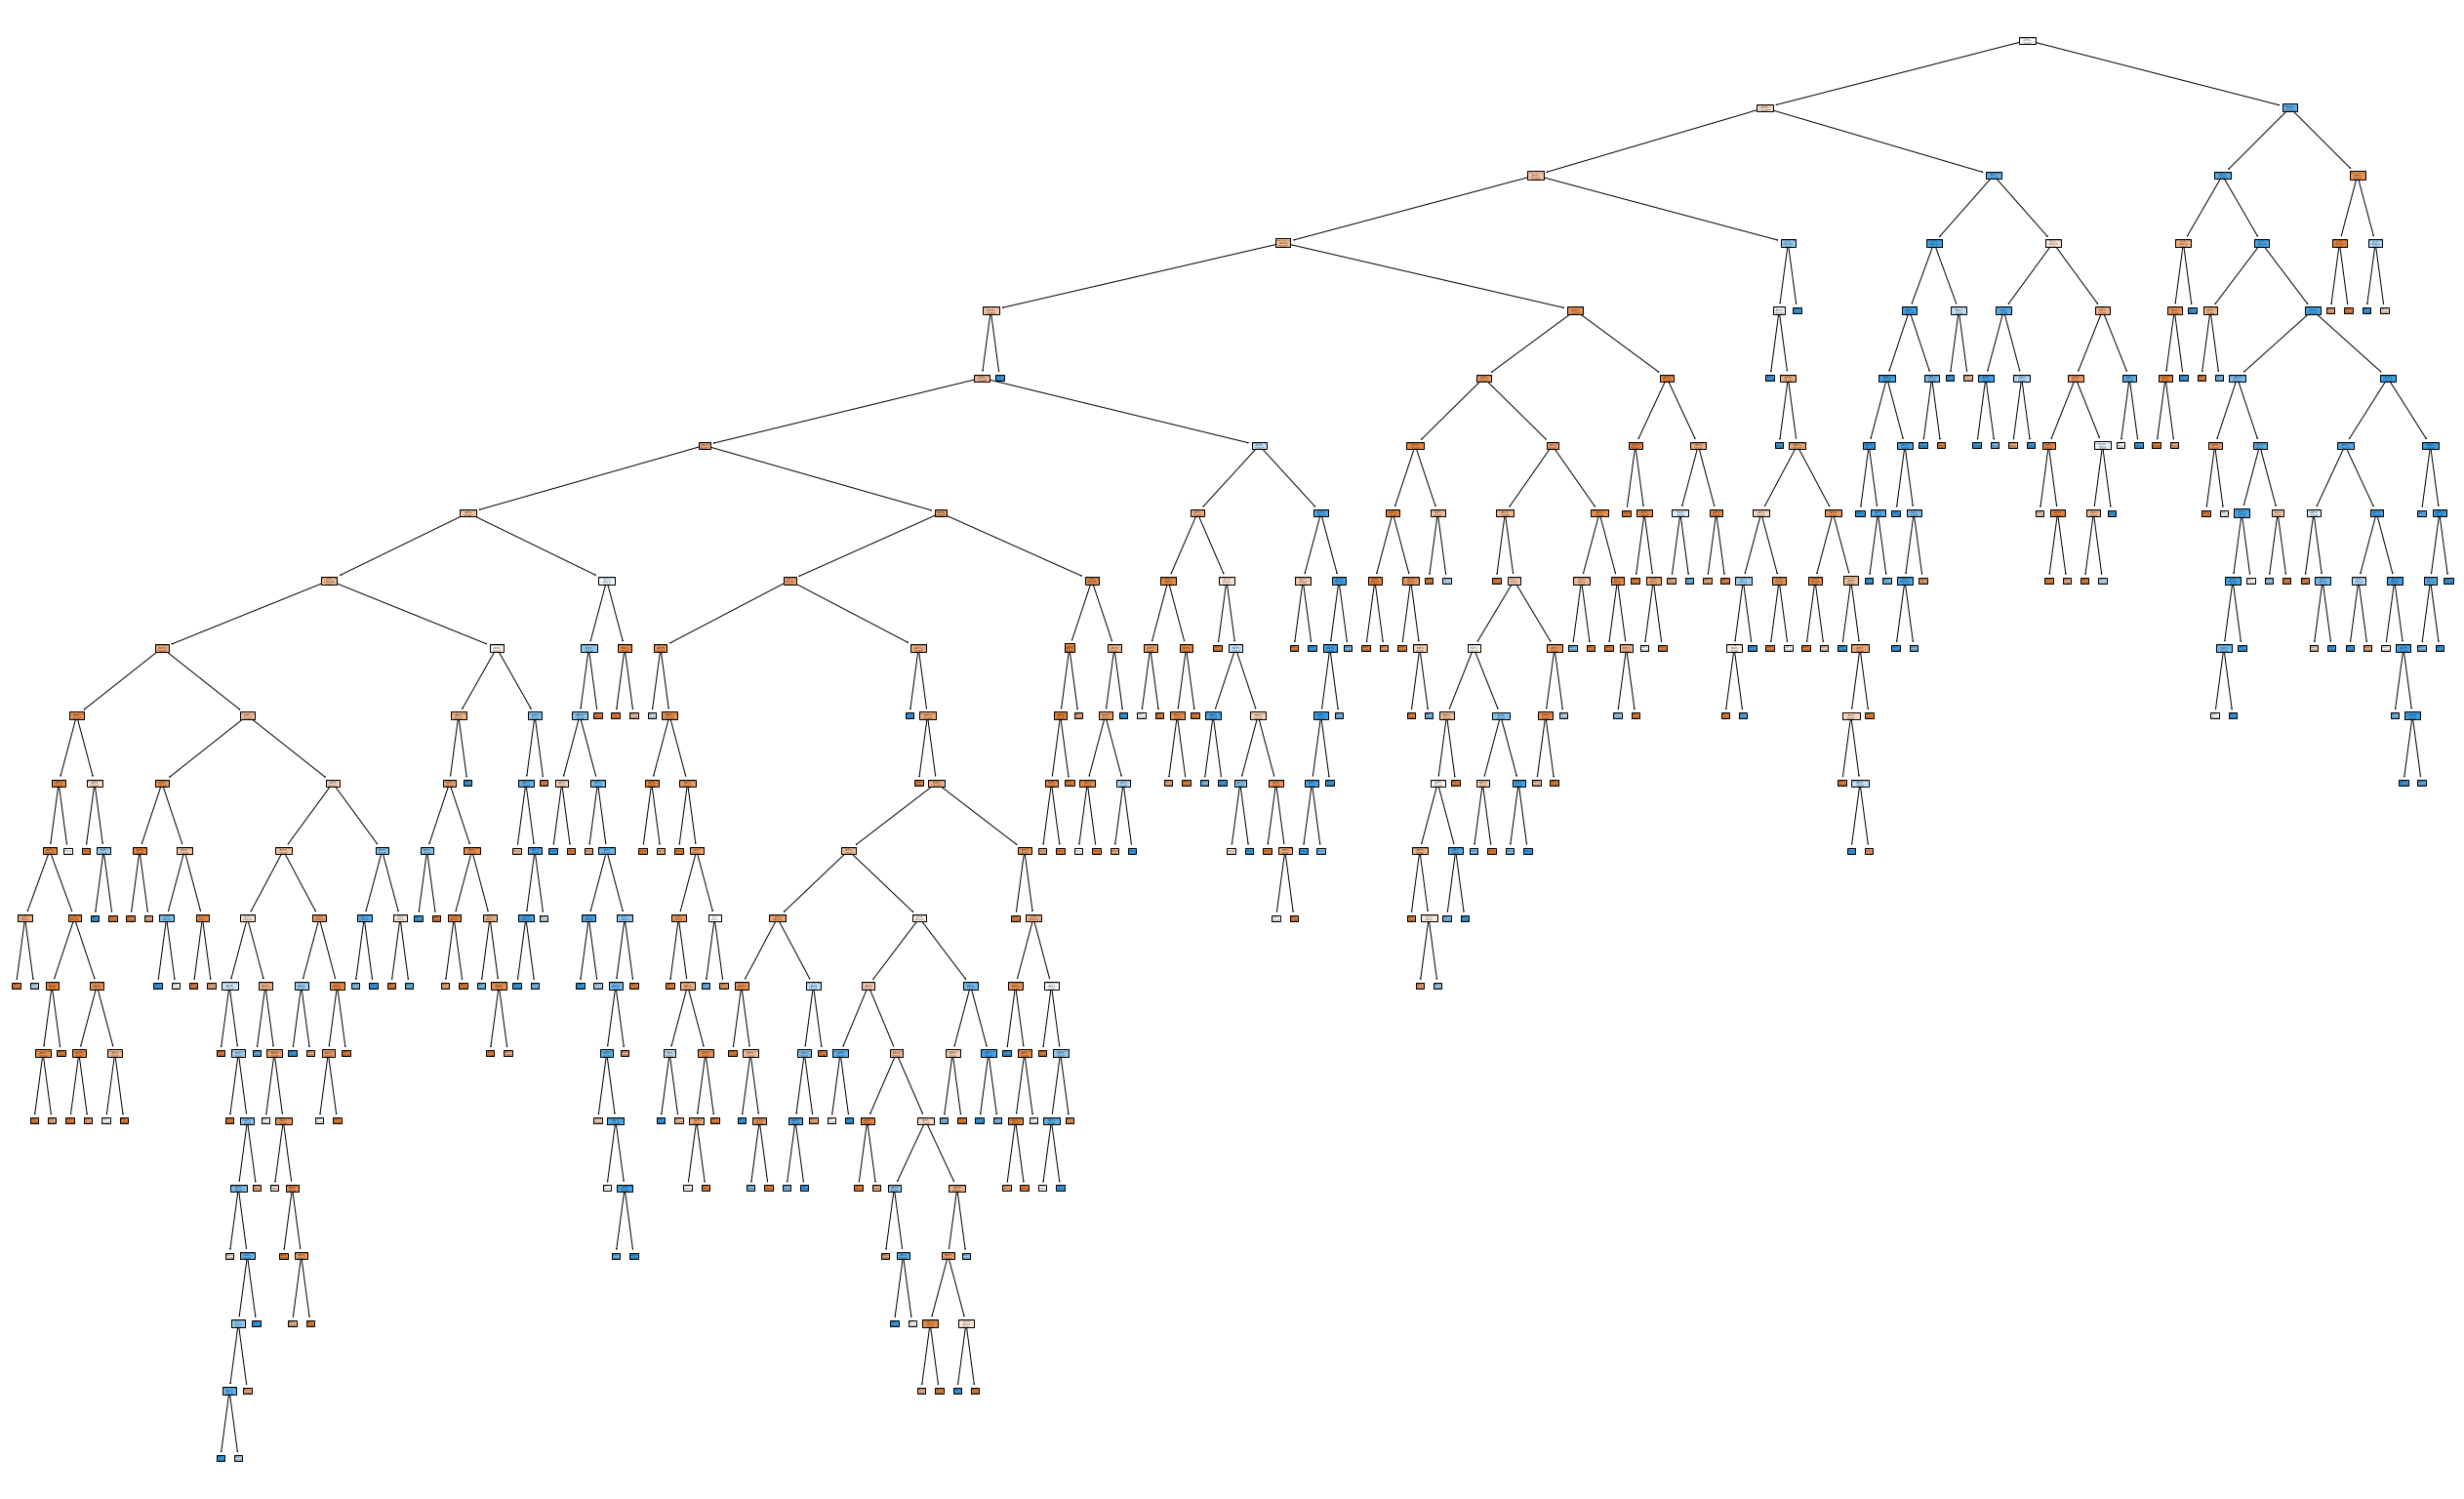

In [44]:
plt.figure(figsize=(45, 28))
plot_tree(best_model_RS, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()